
Gendered Term Counts by Article

Article ID  Female Term Count  Male Term Count
         1                  7               53
         2                  3              118
         3                  3               43
         4                  3               61
         5                 29               80
         6                 69               16
         7                 45               25
         8                  2               15
         9                 25               57
        10                195               28
        11                  1                7
        12                  0                8
        13                  1                4
        14                  0                6
        15                  0                5
        16                  0                0
        17                  3                2
        18                  5                9
        19                 16                1
        20                

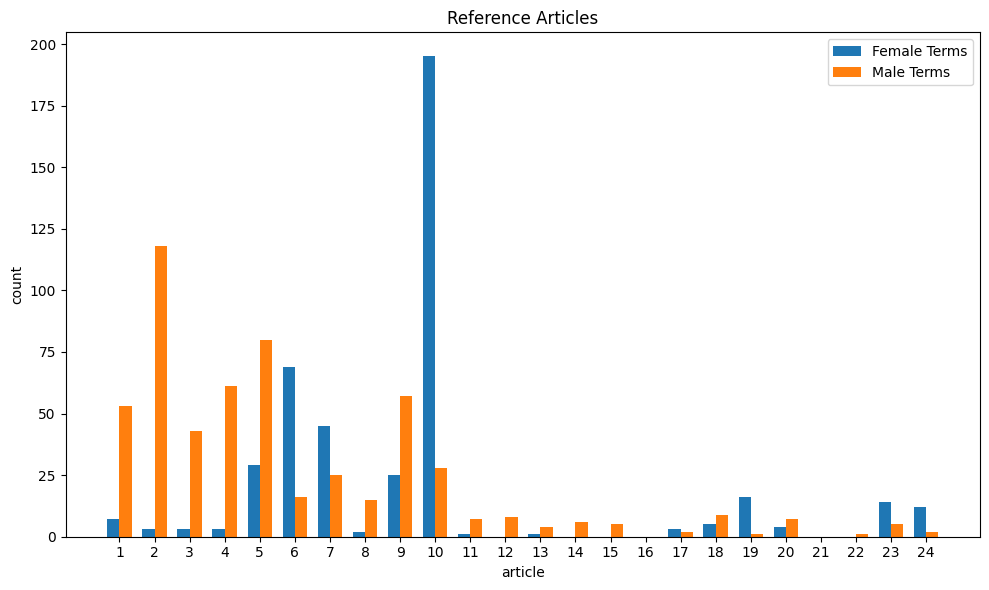

In [27]:
import ast
import re
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'reference_articles.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

#bc of the triple quotes, can't do json.load, parse it into a python dictionary with literal_eval. thank you chatgpt
with open(file_path, 'r', encoding='utf-8') as f:
    file_content = f.read()
articles = ast.literal_eval(file_content)

# regex for matching words, include word boundaries to only get the complete words. thank you google 
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

article_ids = []
female_counts = []
male_counts = []

for article_id, article_text in articles.items():
    f_count = len(female_terms_pattern.findall(article_text))
    m_count = len(male_terms_pattern.findall(article_text))
    
    article_ids.append(article_id)
    female_counts.append(f_count)
    male_counts.append(m_count)

counts_df = pd.DataFrame({
    "Article ID": article_ids,
    "Female Term Count": female_counts,
    "Male Term Count": male_counts
})

print("\nGendered Term Counts by Article\n")
print(counts_df.to_string(index=False))

#plotting time
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(article_ids))
ax.bar(x, female_counts, width=bar_width, label='Female Terms', align='center')
ax.bar([i + bar_width for i in x], male_counts, width=bar_width, label='Male Terms', align='center')
ax.set_xlabel('article')
ax.set_ylabel('count')
ax.set_title('Reference Articles')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(article_ids)
ax.legend()
plt.tight_layout()
plt.show()



 DeepSeek Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  1                1
         3                  0                1
         4                  0                0
         5                  0                0
         6                  0                5
         7                  0                0
         8                  0                1
         9                  0                0
        10                  2                0
        11                  0                0
        12                  0                1
        13                  0                0
        14                  0                1
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  4                0
        20      

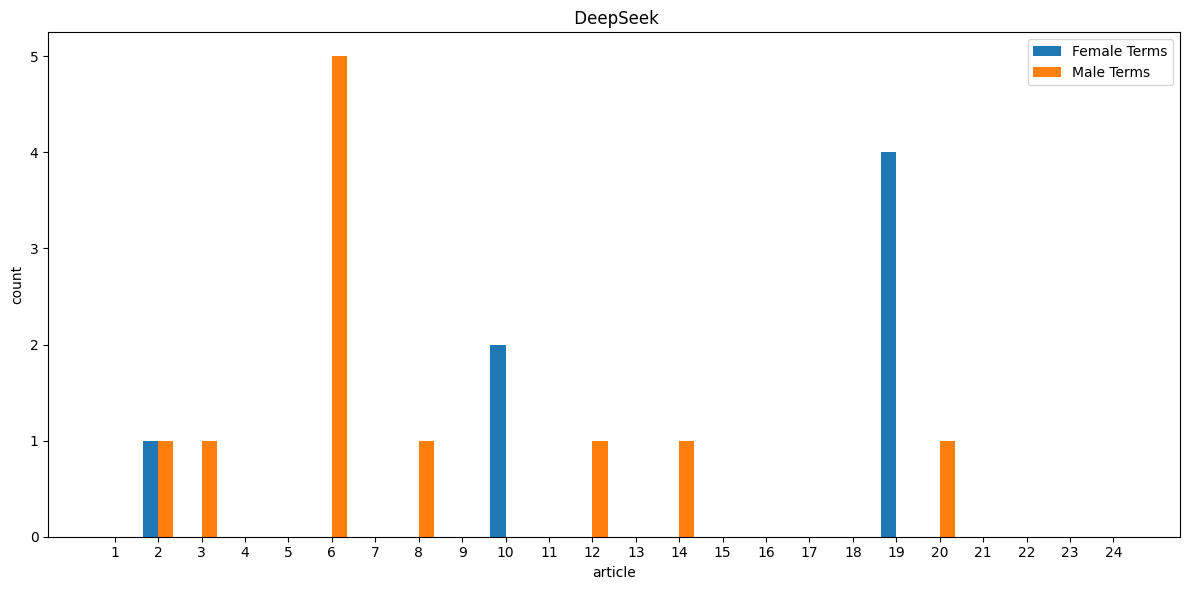


 Claude Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                1
         3                  0                0
         4                  1                0
         5                  0                0
         6                  0                0
         7                  0                0
         8                  0                0
         9                  0                0
        10                  1                0
        11                  0                1
        12                  0                2
        13                  0                0
        14                  0                0
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  3                0
        20        

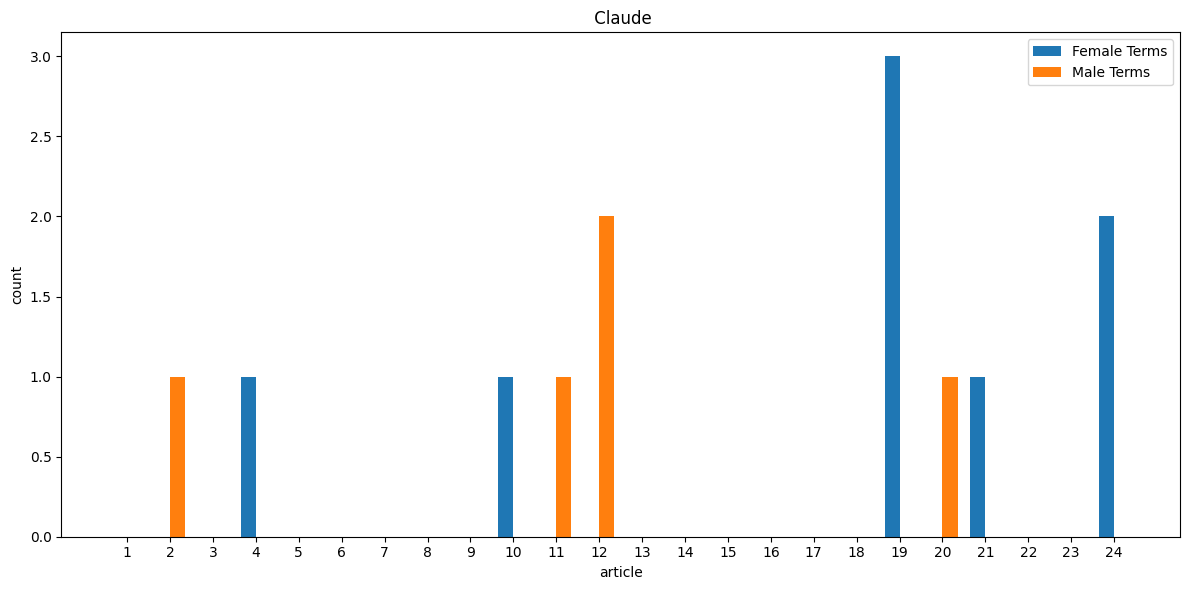


 ChatGPT Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                0
         3                  0                0
         4                  0                0
         5                  0                0
         6                  0                4
         7                  0                0
         8                  0                7
         9                  0                0
        10                  0                0
        11                  0                1
        12                  0                2
        13                  0                0
        14                  0                0
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  3                0
        20       

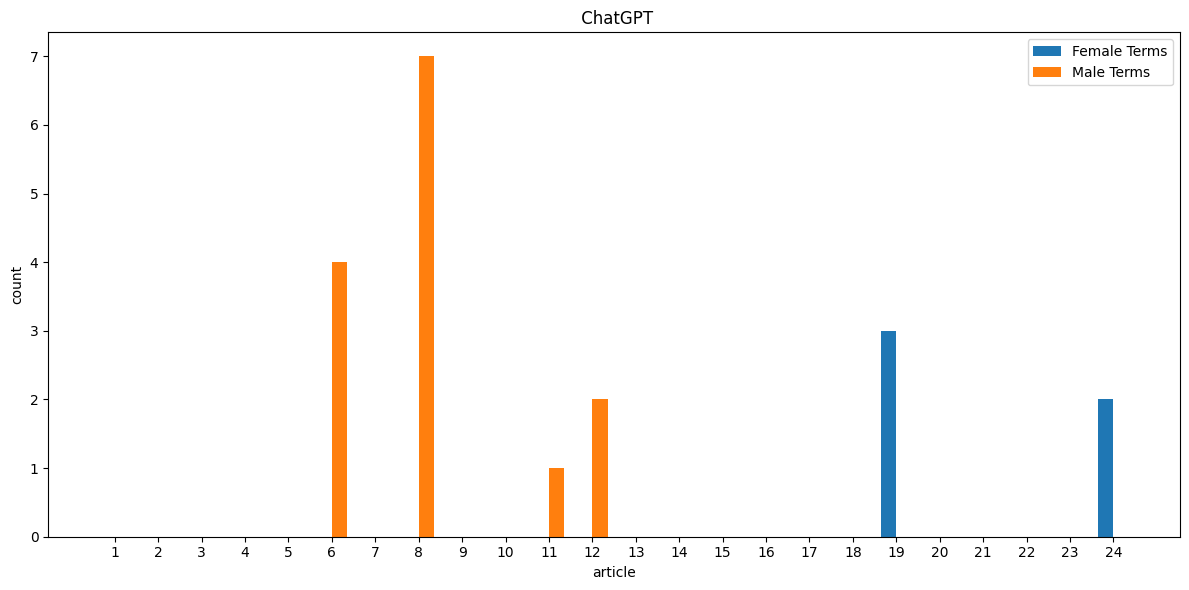

In [28]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt


deepseek_path = 'generated_articles/deepseek_articles.json'
claude_path = 'generated_articles/claude_articles.json'
chatgpt_path = 'generated_articles/chatgpt_articles.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

def load_articles(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

deepseek_articles = load_articles(deepseek_path)
claude_articles = load_articles(claude_path)
chatgpt_articles = load_articles(chatgpt_path)

#to make sure only whole words are counted
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

def count_gendered_terms_per_article(articles):
    article_ids = []
    female_counts = []
    male_counts = []
    for article_id, text in articles.items():
        f_count = len(female_terms_pattern.findall(text))
        m_count = len(male_terms_pattern.findall(text))
        article_ids.append(article_id)
        female_counts.append(f_count)
        male_counts.append(m_count)
    return pd.DataFrame({
        'Article ID': article_ids,
        'Female Term Count': female_counts,
        'Male Term Count': male_counts
    })

deepseek_df = count_gendered_terms_per_article(deepseek_articles)
claude_df = count_gendered_terms_per_article(claude_articles)
chatgpt_df = count_gendered_terms_per_article(chatgpt_articles)

def plot_gendered_terms(df, model_name):
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.35
    x = range(len(df))
    ax.bar(x, df['Female Term Count'], width=bar_width, label='Female Terms', align='center')
    ax.bar([i + bar_width for i in x], df['Male Term Count'], width=bar_width, label='Male Terms', align='center')
    ax.set_xlabel('article')
    ax.set_ylabel('count')
    ax.set_title(f' {model_name}')
    ax.set_xticks([i + bar_width/2 for i in x])
    ax.set_xticklabels(df['Article ID'])
    ax.legend()
    plt.tight_layout()
    plt.show()

print("\n DeepSeek Articles - Gendered Term Counts ")
print(deepseek_df.to_string(index=False))
plot_gendered_terms(deepseek_df, "DeepSeek")

print("\n Claude Articles - Gendered Term Counts ")
print(claude_df.to_string(index=False))
plot_gendered_terms(claude_df, "Claude")

print("\n ChatGPT Articles - Gendered Term Counts ")
print(chatgpt_df.to_string(index=False))
plot_gendered_terms(chatgpt_df, "ChatGPT")


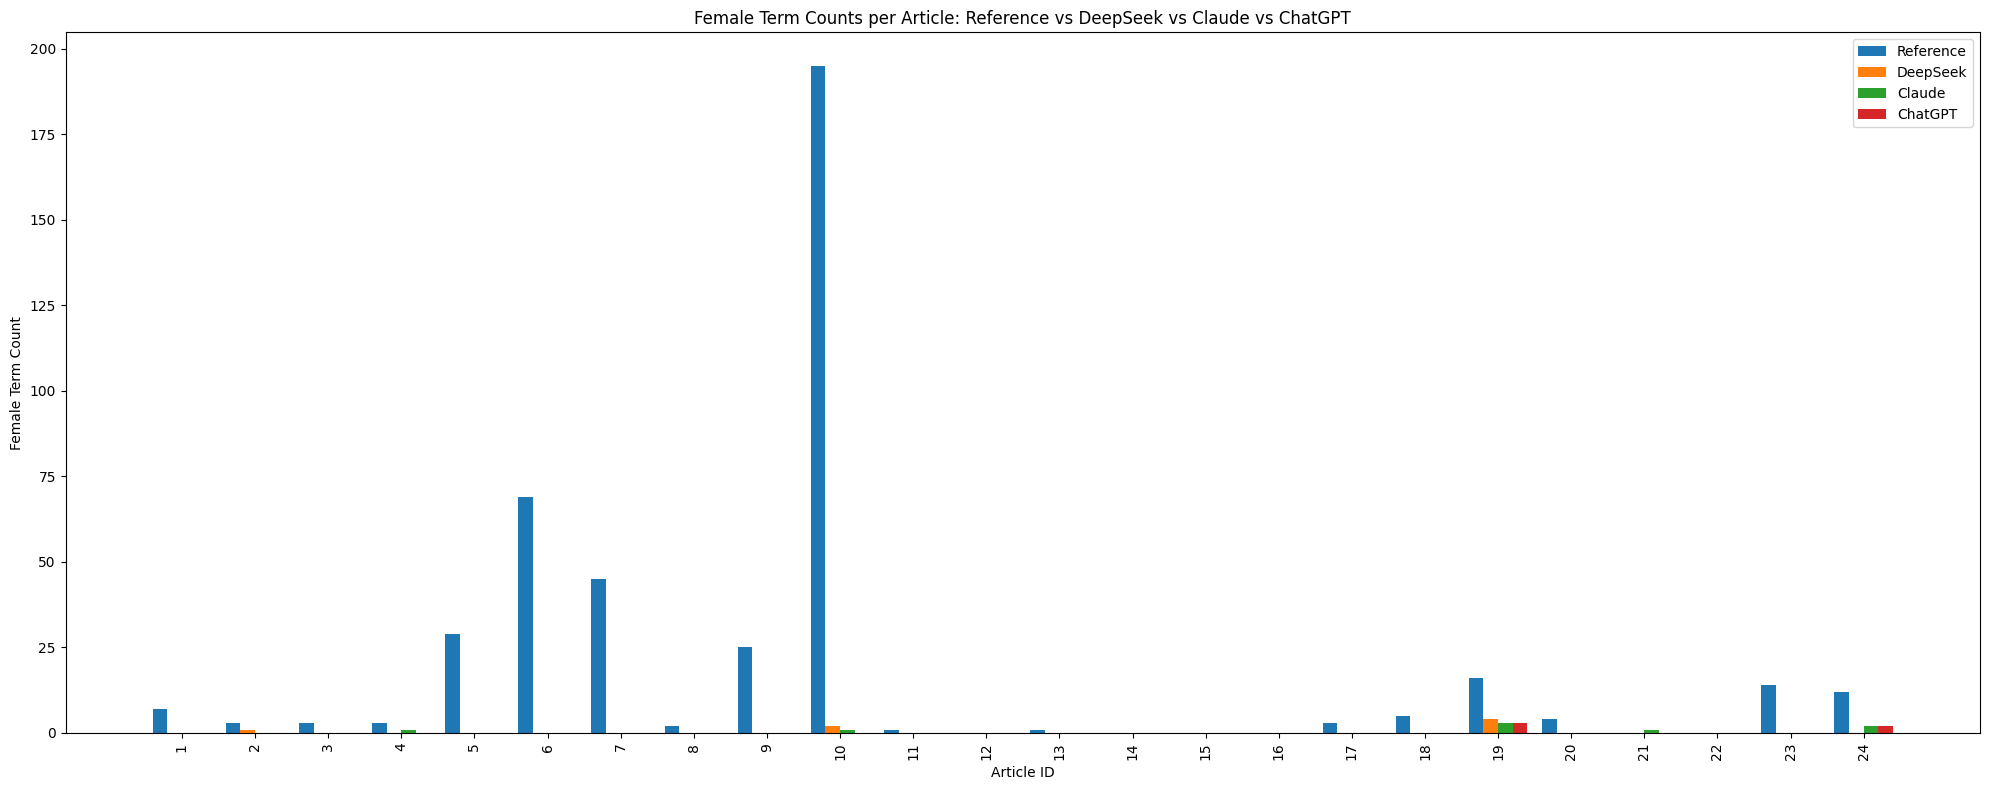

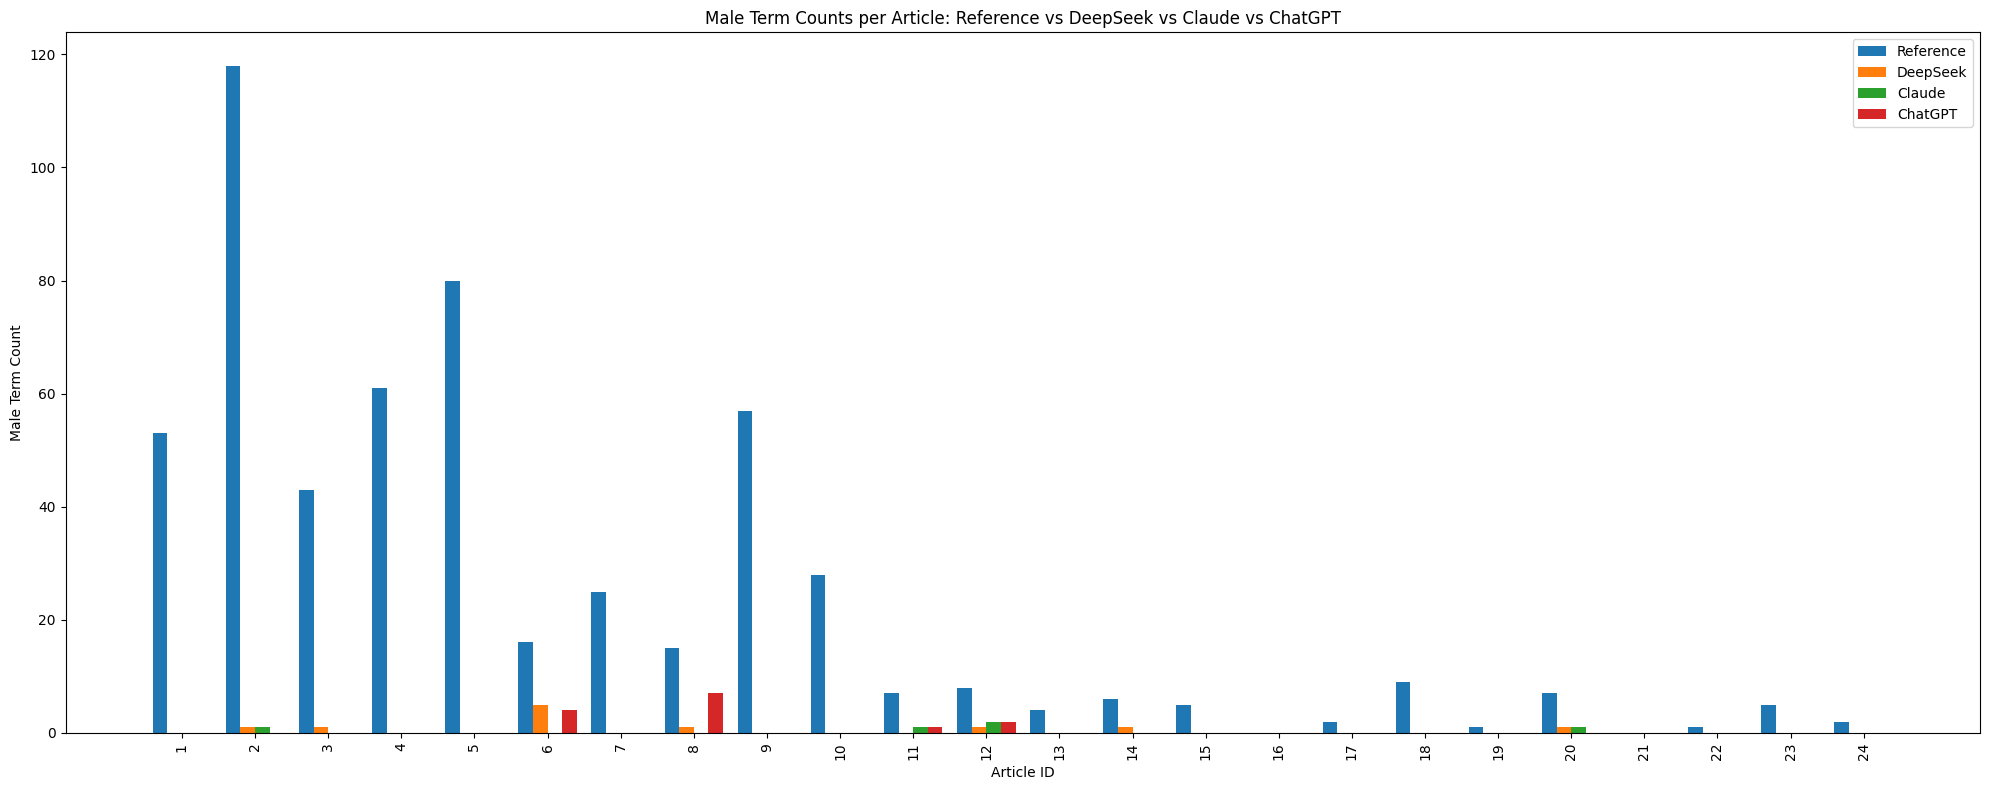

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Merge all data into one DataFrame for comparison

# First, make sure Article IDs are aligned and sorted the same way
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Combine into a long format
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])  # <- make sure it's treated numerically
    records.append({'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'ChatGPT',    'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],    'Male Terms': chatgpt_df.loc[i, 'Male Term Count']})

full_df = pd.DataFrame(records)

# 3. Sort full_df properly
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Models and article IDs
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# 4. Plot Female Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Female Term Count')
ax.set_title('Female Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Plot Male Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Male Term Count')
ax.set_title('Male Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


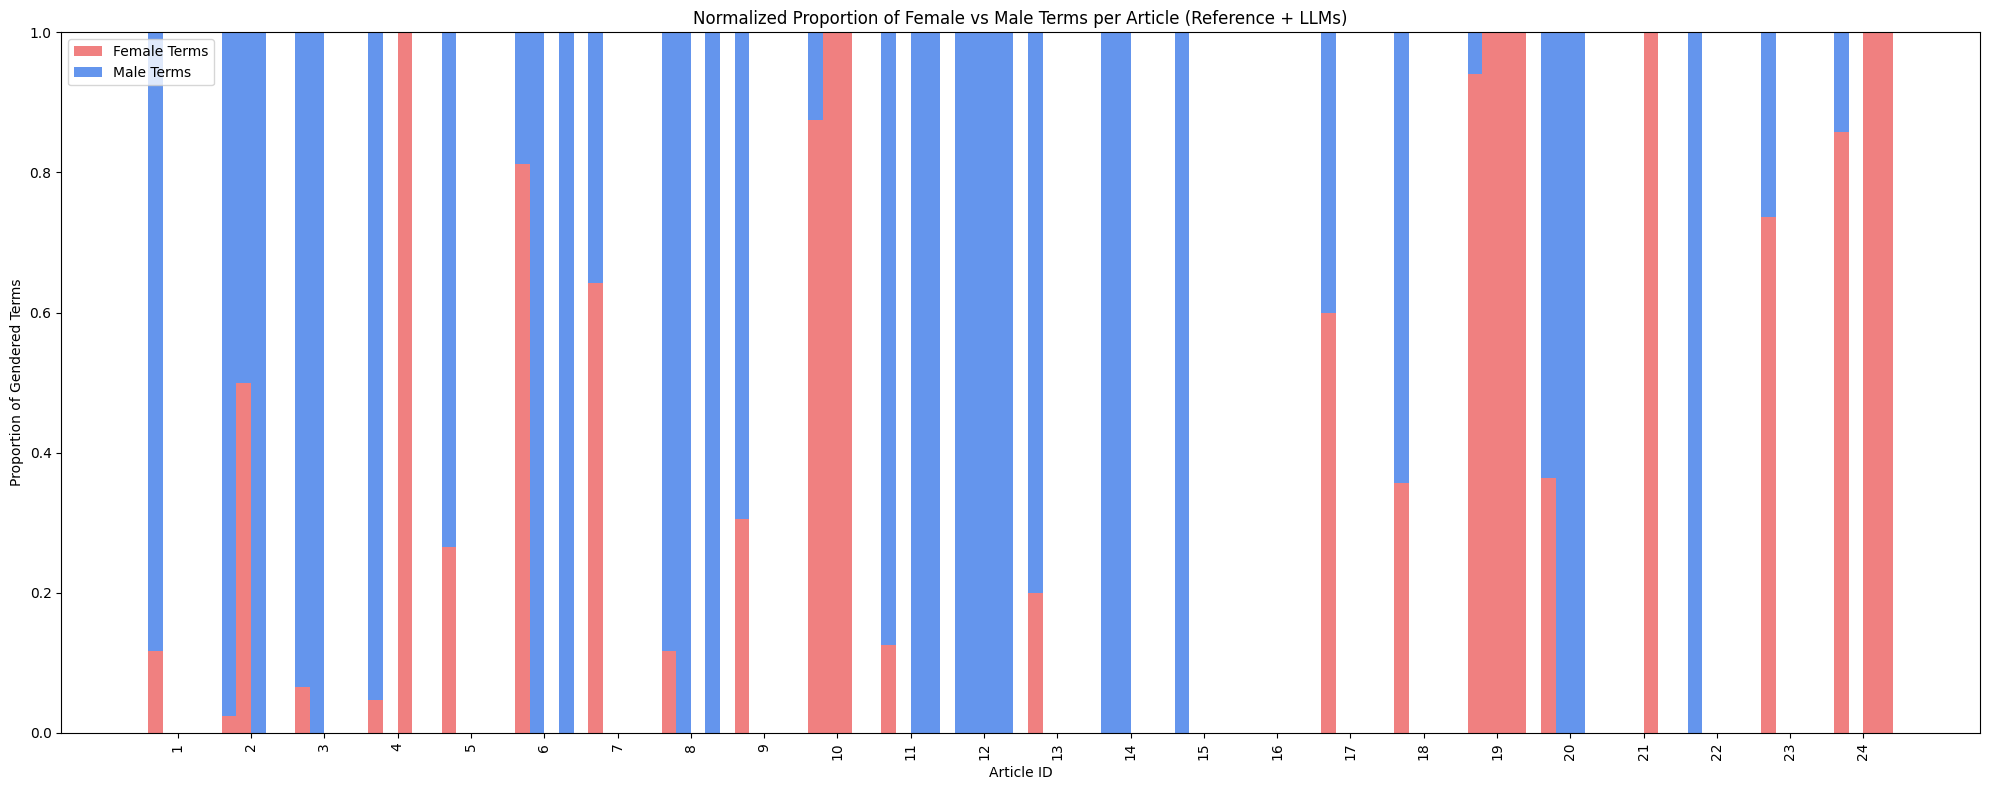

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge all again just to be safe
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# Combine into a single dataframe
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])  # ensure numerical
    records.append({'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'ChatGPT',    'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],    'Male Terms': chatgpt_df.loc[i, 'Male Term Count']})

full_df = pd.DataFrame(records)

# Make sure sorted properly
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Calculate proportions
full_df['Total Terms'] = full_df['Female Terms'] + full_df['Male Terms']
full_df['Female Proportion'] = full_df['Female Terms'] / full_df['Total Terms']
full_df['Male Proportion'] = full_df['Male Terms'] / full_df['Total Terms']

# Handle divisions by zero safely
full_df['Female Proportion'] = full_df['Female Proportion'].fillna(0)
full_df['Male Proportion'] = full_df['Male Proportion'].fillna(0)

# Plot settings
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# Plot normalized stacked bar plot
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female Proportion'],
        width=bar_width,
        label=None if i else 'Female Terms',  # only label first time for legend
        color='lightcoral'
    )
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male Proportion'],
        width=bar_width,
        bottom=subset['Female Proportion'],
        label=None if i else 'Male Terms',  # only label first time for legend
        color='cornflowerblue'
    )

# Aesthetics
ax.set_xlabel('Article ID')
ax.set_ylabel('Proportion of Gendered Terms')
ax.set_title('Normalized Proportion of Female vs Male Terms per Article (Reference + LLMs)')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend(['Female Terms', 'Male Terms'])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
